In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

from matplotlib import pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")

plt.rc("figure", figsize=(11,6))
plt.rc("font", size=13)

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)
print("Seaborn Version: " + sns.__version__)

Pandas Version: 1.2.4
Numpy Version: 1.18.5
Seaborn Version: 0.11.1


### From the [Dark Sky API](https://darksky.net/dev/docs#response-format)

Data is provided for each hour of a day.

* `precipIntensity`: The intensity of precipitation occurring at the given time. This value is conditional on probability (that is, assuming any precipitation occurs at all).
* `precipProbability`: The probability of precipitation occurring, between 0 and 1, inclusive.
* `precipType`: The type of precipitation occurring at the given time. If defined, this property will have one of the following values: "rain", "snow", or "sleet" (which refers to each of freezing rain, ice pellets, and “wintery mix”). (If precipIntensity is zero, then this property will not be defined. Additionally, due to the lack of data in our sources, historical `precipType` information is usually estimated, rather than observed.)
* `precipAccumulation`: The amount of snowfall accumulation expected to occur (over the hour or day, respectively). (If no snowfall is expected, this property will not be defined.)
* `temperature`: The air temperature.
* `apparentTemperature`: The apparent (or “feels like”) temperature.
* `dewPoint`: The dew point.
* `humidity`: The relative humidity, between 0 and 1, inclusive.
* `windSpeed`: The wind speed.
* `windGust`: The wind gust speed.
* `windBearing`: The direction that the wind is coming from in degrees, with true north at 0° and progressing clockwise. (If windSpeed is zero, then this value will not be defined.)
* `uvIndex`: The UV index.
* `cloudCover`: The percentage of sky occluded by clouds, between 0 and 1, inclusive.
* `pressure`: The sea-level air pressure.
* `visibility`: The average visibility, capped at 16.093 Kilometers (10 miles).

SI units are as follows:

* `precipIntensity`: Millimeters per hour.
* `precipAccumulation`: Centimeters.
* `temperature`: Degrees Celsius.
* `apparentTemperature`: Degrees Celsius.
* `dewPoint`: Degrees Celsius.
* `windSpeed`: Meters per second.
* `pressure`: Hectopascals.
* `visibility`: Kilometers.

Although a timezone is provided, it has to be dropped from the timestamps since the target bike data is not timezone-aware.

In [72]:
df = pd.read_csv("../data/dark_sky_api/weather.csv")

Since timestamps were removed from the previously timezone-aware data set, there are three duplicate dates:

In [73]:
tmp = df[df.duplicated(subset=['datetime'])]
duplicated_dates = tmp['datetime']
tmp

,datetime,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
7154,2014-10-26 02:00:00,0.0,0.0,NaN,NaN,12.14,12.14,11.51,0.96,3.84,3.84,220.0,0.0,6.004,0.75,1021.3
15890,2015-10-25 02:00:00,0.0,0.0,NaN,NaN,10.27,10.27,9.22,0.93,5.58,5.58,229.0,0.0,10.003,0.75,1015.6
24794,2016-10-30 02:00:00,0.0,0.0,NaN,NaN,9.65,8.53,7.86,0.89,2.32,2.32,281.0,0.0,10.003,0.75,NaN


In [74]:
df[df.datetime.isin(duplicated_dates)]

,datetime,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
7153,2014-10-26 02:00:00,0.0,0.0,NaN,NaN,12.34,12.34,11.78,0.96,2.87,2.87,210.0,0.0,6.004,0.75,1021.2
7154,2014-10-26 02:00:00,0.0,0.0,NaN,NaN,12.14,12.14,11.51,0.96,3.84,3.84,220.0,0.0,6.004,0.75,1021.3
15889,2015-10-25 02:00:00,0.0,0.0,NaN,NaN,10.02,10.02,8.96,0.93,4.71,4.71,240.0,0.0,10.003,0.75,1015.6
15890,2015-10-25 02:00:00,0.0,0.0,NaN,NaN,10.27,10.27,9.22,0.93,5.58,5.58,229.0,0.0,10.003,0.75,1015.6
24793,2016-10-30 02:00:00,0.0,0.0,NaN,NaN,9.67,8.52,7.85,0.88,2.38,2.38,272.0,0.0,10.003,0.75,NaN
24794,2016-10-30 02:00:00,0.0,0.0,NaN,NaN,9.65,8.53,7.86,0.89,2.32,2.32,281.0,0.0,10.003,0.75,NaN


Since each pair of rows are fairly similar the seond one is dropped.

In [75]:
df.drop_duplicates(subset=['datetime'], keep='first', inplace=True)

In [76]:
df.sample(5)

,datetime,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
26736,2017-01-19 00:00:00,0.0000,0.00,NaN,NaN,-1.38,-3.23,-4.69,0.78,1.44,1.44,210.0,0.0,6.994,0.75,NaN
16751,2015-11-29 23:00:00,0.0255,0.06,rain,NaN,7.92,4.41,2.90,0.71,6.54,6.54,252.0,0.0,10.003,0.44,997.9
4957,2014-07-26 14:00:00,0.0000,0.00,NaN,NaN,24.73,24.91,17.22,0.63,3.15,3.15,123.0,6.0,10.003,0.44,NaN
18600,2016-02-15 00:00:00,0.0853,0.18,snow,0.0405,1.05,-2.86,0.82,0.98,3.80,3.80,7.0,0.0,2.997,0.75,NaN
20515,2016-05-04 20:00:00,0.0000,0.00,NaN,NaN,15.06,15.06,1.00,0.38,2.62,2.62,279.0,NaN,10.003,NaN,1028.6


In [77]:
df.describe()

,precip_intensity,precip_probability,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
count,29564.000000,29564.000000,266.000000,29564.000000,29564.000000,29564.000000,29564.000000,29564.000000,29440.000000,29248.000000,26864.000000,29509.000000,22841.000000,15070.000000
mean,0.034909,0.035314,0.042020,10.103103,8.748919,6.097910,0.783606,3.571964,3.926339,192.988751,0.728373,8.998286,0.622366,1015.059814
std,0.170891,0.098738,0.120915,7.068482,8.393467,6.015893,0.159838,2.101521,2.739444,89.174572,1.442890,2.218434,0.253213,9.628267
min,0.000000,0.000000,0.002300,-12.080000,-19.100000,-15.240000,0.230000,0.000000,0.000000,0.000000,0.000000,0.099000,0.000000,972.100000
25%,0.000000,0.000000,0.004825,4.950000,2.080000,1.580000,0.680000,2.000000,2.060000,114.000000,0.000000,9.595000,0.440000,1009.400000
50%,0.000000,0.000000,0.008250,9.690000,8.320000,6.000000,0.820000,3.190000,3.350000,219.000000,0.000000,10.003000,0.750000,1015.800000
75%,0.000000,0.000000,0.019350,15.112500,15.130000,10.860000,0.910000,4.760000,4.890000,260.000000,1.000000,10.003000,0.750000,1021.400000
max,6.925600,1.000000,1.360700,36.420000,36.650000,23.400000,1.000000,14.470000,25.970000,359.000000,7.000000,16.093000,1.000000,1051.400000


In [79]:
def display_nan_stats(data_frame):
    stats = pd.DataFrame(data_frame.isnull().sum())
    stats.columns = ['NaN values']
    stats['% missing'] = round((stats['NaN values'] / data_frame.shape[0]) * 100, 2)
    return stats

In [80]:
display_nan_stats(df)

,NaN values,% missing
datetime,0,0.00
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,22708,76.81
precip_accumulation,29298,99.10
temperature,0,0.00
apparent_temperature,0,0.00
dew_point,0,0.00
humidity,0,0.00
wind_speed,0,0.00


In [81]:
df.loc[df.precip_type.isna()][['precip_probability']].describe()

,precip_probability
count,22708.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [82]:
# If the type of precipitation is NaN, the probability of precipitation is always 0.
# We assume that there was no precipitation and replace NaN with 'none'.

df.fillna({'precip_type': 'none'}, inplace=True)

In [83]:
# If the probability of precipitation is 0 we also assume that the precipitation accumulation is 0.

condition = (df['precip_accumulation'].isna()) & (df['precip_type'] == 'none')
df.loc[condition, 'precip_accumulation'] = 0.0

In [84]:
display_nan_stats(df)

,NaN values,% missing
datetime,0,0.00
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,0,0.00
precip_accumulation,6590,22.29
temperature,0,0.00
apparent_temperature,0,0.00
dew_point,0,0.00
humidity,0,0.00
wind_speed,0,0.00


In [85]:
df.corr()

,precip_intensity,precip_probability,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
precip_intensity,1.000000,0.732194,0.977346,0.016255,0.010603,0.088800,0.129312,0.085031,0.103096,0.046052,-0.013119,-0.068657,0.099944,-0.153188
precip_probability,0.732194,1.000000,0.605353,-0.033183,-0.046871,0.077002,0.210236,0.169649,0.194084,0.091073,-0.026637,-0.115197,0.166005,-0.251786
precip_accumulation,0.977346,0.605353,1.000000,-0.046368,-0.046278,-0.036808,0.035470,-0.006279,-0.007536,-0.006846,-0.015680,-0.067523,0.033353,-0.037409
temperature,0.016255,-0.033183,-0.046368,1.000000,0.988852,0.860457,-0.464070,-0.021279,-0.014882,0.000876,0.443926,0.280387,-0.145308,0.021010
apparent_temperature,0.010603,-0.046871,-0.046278,0.988852,1.000000,0.865629,-0.433292,-0.108980,-0.094220,0.004690,0.429441,0.261131,-0.165049,0.052864
dew_point,0.088800,0.077002,-0.036808,0.860457,0.865629,1.000000,0.044109,-0.084491,-0.081106,0.030971,0.265498,0.107560,-0.054179,-0.043213
humidity,0.129312,0.210236,0.035470,-0.464070,-0.433292,0.044109,1.000000,-0.119850,-0.126784,0.039794,-0.430134,-0.415403,0.207087,-0.101850
wind_speed,0.085031,0.169649,-0.006279,-0.021279,-0.108980,-0.084491,-0.119850,1.000000,0.929597,0.115210,0.115851,0.123491,0.177378,-0.301542
wind_gust,0.103096,0.194084,-0.007536,-0.014882,-0.094220,-0.081106,-0.126784,0.929597,1.000000,0.152418,0.127908,0.119475,0.161172,-0.300297
wind_bearing,0.046052,0.091073,-0.006846,0.000876,0.004690,0.030971,0.039794,0.115210,0.152418,1.000000,0.084509,0.058427,0.003758,-0.053990


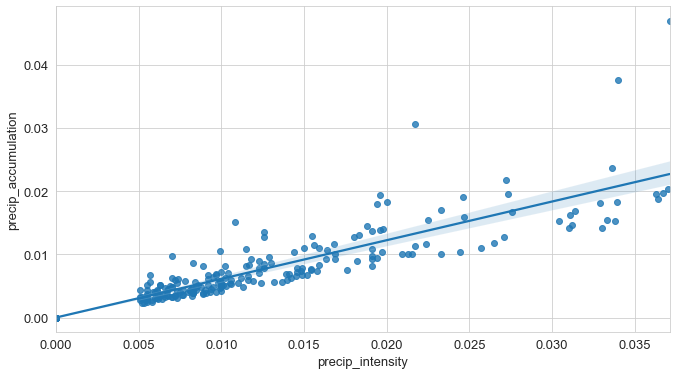

In [86]:
tmp = df.loc[df.precip_intensity <= df.precip_intensity.quantile(0.9)]
sns_plot = sns.regplot(data=tmp, x='precip_intensity', y='precip_accumulation')
sns_plot.get_figure().savefig("figures/weather_corr_precip.png", bbox_inches="tight")
plt.show()

# 'precip_intensity' and 'precip_accumulation' seem to be linearly correlated.
# If bike trips are relating to one of these columns, having the other one present in the data set as well
# is not favourable (multicollinearity). Since 22% of the 'precip_accumulation' values are missing, the
# column will be dropped entirely.

In [87]:
df.drop('precip_accumulation', axis=1, inplace=True)

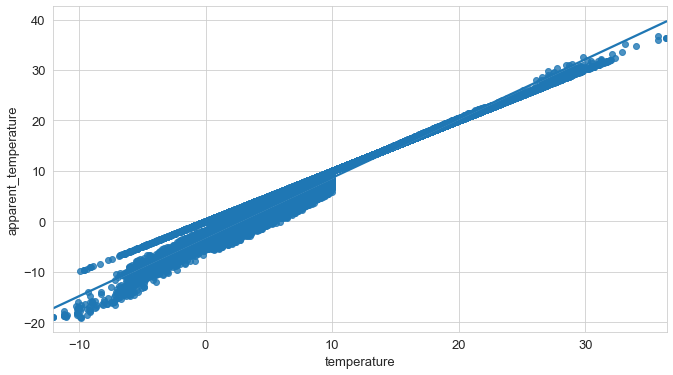

In [88]:
sns_plot = sns.regplot(data=df, x='temperature', y='apparent_temperature')
sns_plot.get_figure().savefig("figures/weather_corr_temp.png", bbox_inches="tight")
plt.show()

In [89]:
# 'temperature' and 'apparent_temperature' are heavily correlated as well, so 'apparent_temperature' will be dropped.

df.drop('apparent_temperature', axis=1, inplace=True)

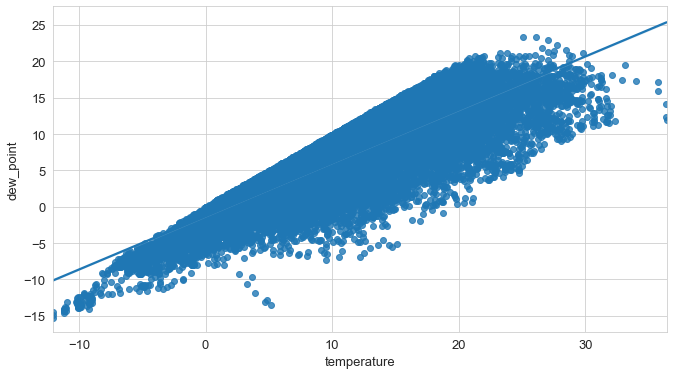

In [90]:
sns_plot = sns.regplot(data=df, x='temperature', y='dew_point')
sns_plot.get_figure().savefig("figures/weather_corr_temp_dew.png", bbox_inches="tight")
plt.show()

In [91]:
# 'temperature' and 'dew_point' are heavily correlated as well, so 'dew_point' will be dropped.

df.drop('dew_point', axis=1, inplace=True)

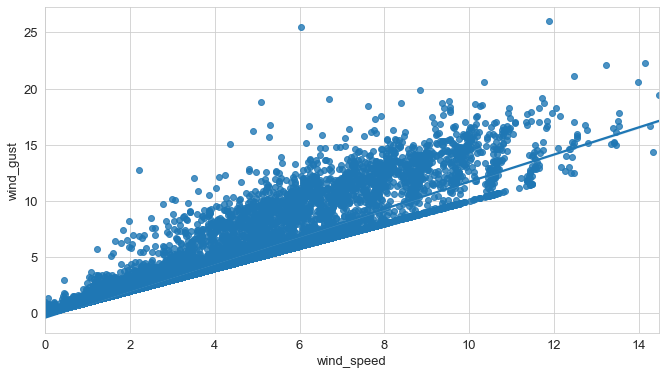

In [92]:
sns_plot = sns.regplot(data=df, x='wind_speed', y='wind_gust')
sns_plot.get_figure().savefig("figures/weather_corr_wind.png", bbox_inches="tight")
plt.show()

In [93]:
# 'wind_speed' and 'wind_gust' are heavily correlated as well, so 'wind_gust' will be dropped.

df.drop('wind_gust', axis=1, inplace=True)

In [56]:
display_nan_stats(df)

,NaN values,% missing
datetime,0,0.00
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,0,0.00
temperature,0,0.00
humidity,0,0.00
wind_speed,0,0.00
wind_bearing,316,1.07
uv_index,2700,9.13
visibility,55,0.19


<AxesSubplot:>

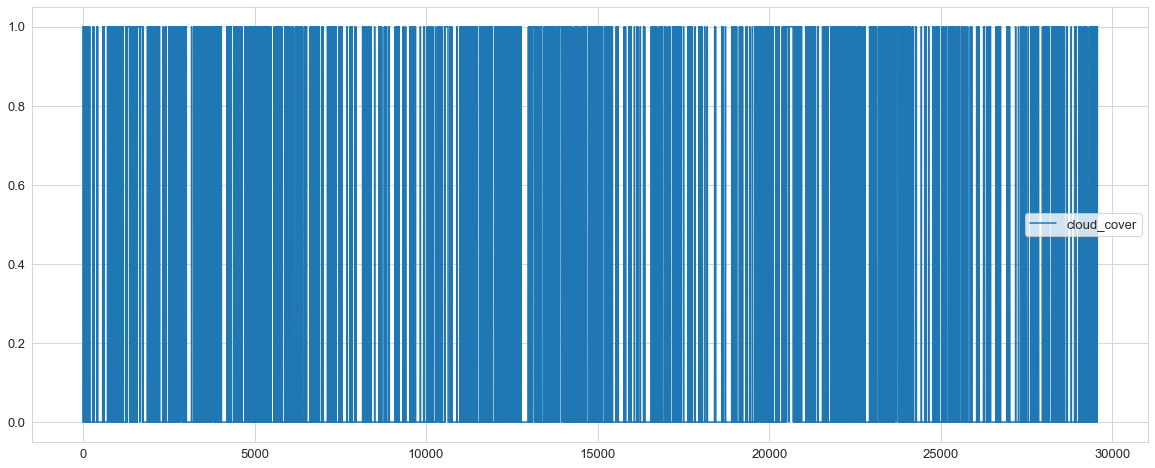

In [57]:
# Display missing 'cloud_cover' as a barcode-like graph.
# A visible bar indicates a missing value

tmp = df[['cloud_cover']].copy()
tmp['cloud_cover'] = np.where(tmp['cloud_cover'].isna(), 1.0, 0.0)
tmp.plot(figsize=(20, 8))

<AxesSubplot:>

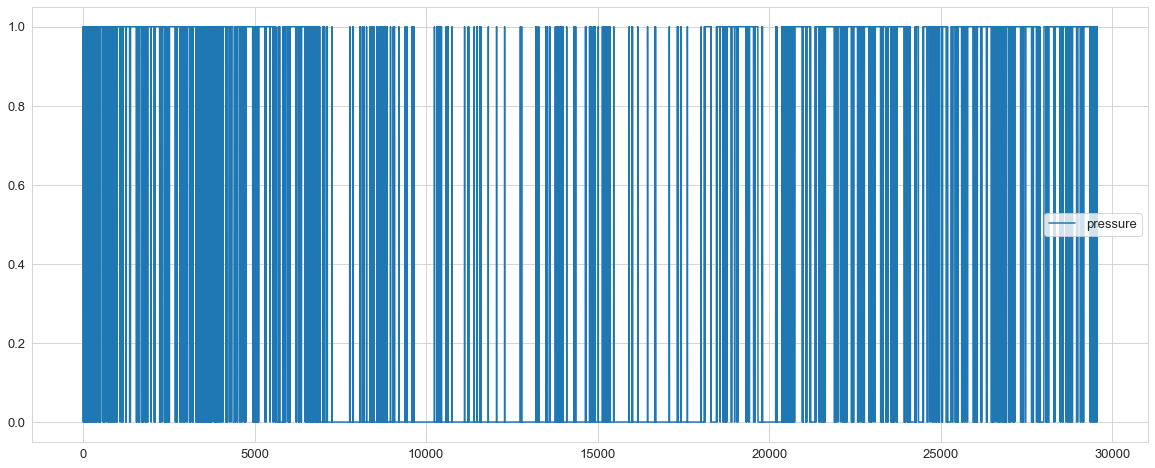

In [58]:
# Display missing 'pressure' as a barcode-like graph.
# A visible bar indicates a missing value

tmp = df[['pressure']].copy()
tmp['pressure'] = np.where(tmp['pressure'].isna(), 1.0, 0.0)
tmp.plot(figsize=(20, 8))

In [59]:
# Interpolate missing values in both directions. A limit of 8 allows to fill all NaN values of uv_index.

df.interpolate(limit_direction='both', inplace=True, limit=8)

In [60]:
display_nan_stats(df)

,NaN values,% missing
datetime,0,0.00
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,0,0.00
temperature,0,0.00
humidity,0,0.00
wind_speed,0,0.00
wind_bearing,0,0.00
uv_index,0,0.00
visibility,0,0.00


In [61]:
# UV index was originally given as integers, round interpolated values will and convert them to integers

df.uv_index = df.uv_index.round().astype(int)

In [62]:
# Since the gaps in the 'cloud_cover' and 'pressure' columns are too large, they will be dropped as well.

df.drop('cloud_cover', axis=1, inplace=True)
df.drop('pressure', axis=1, inplace=True)

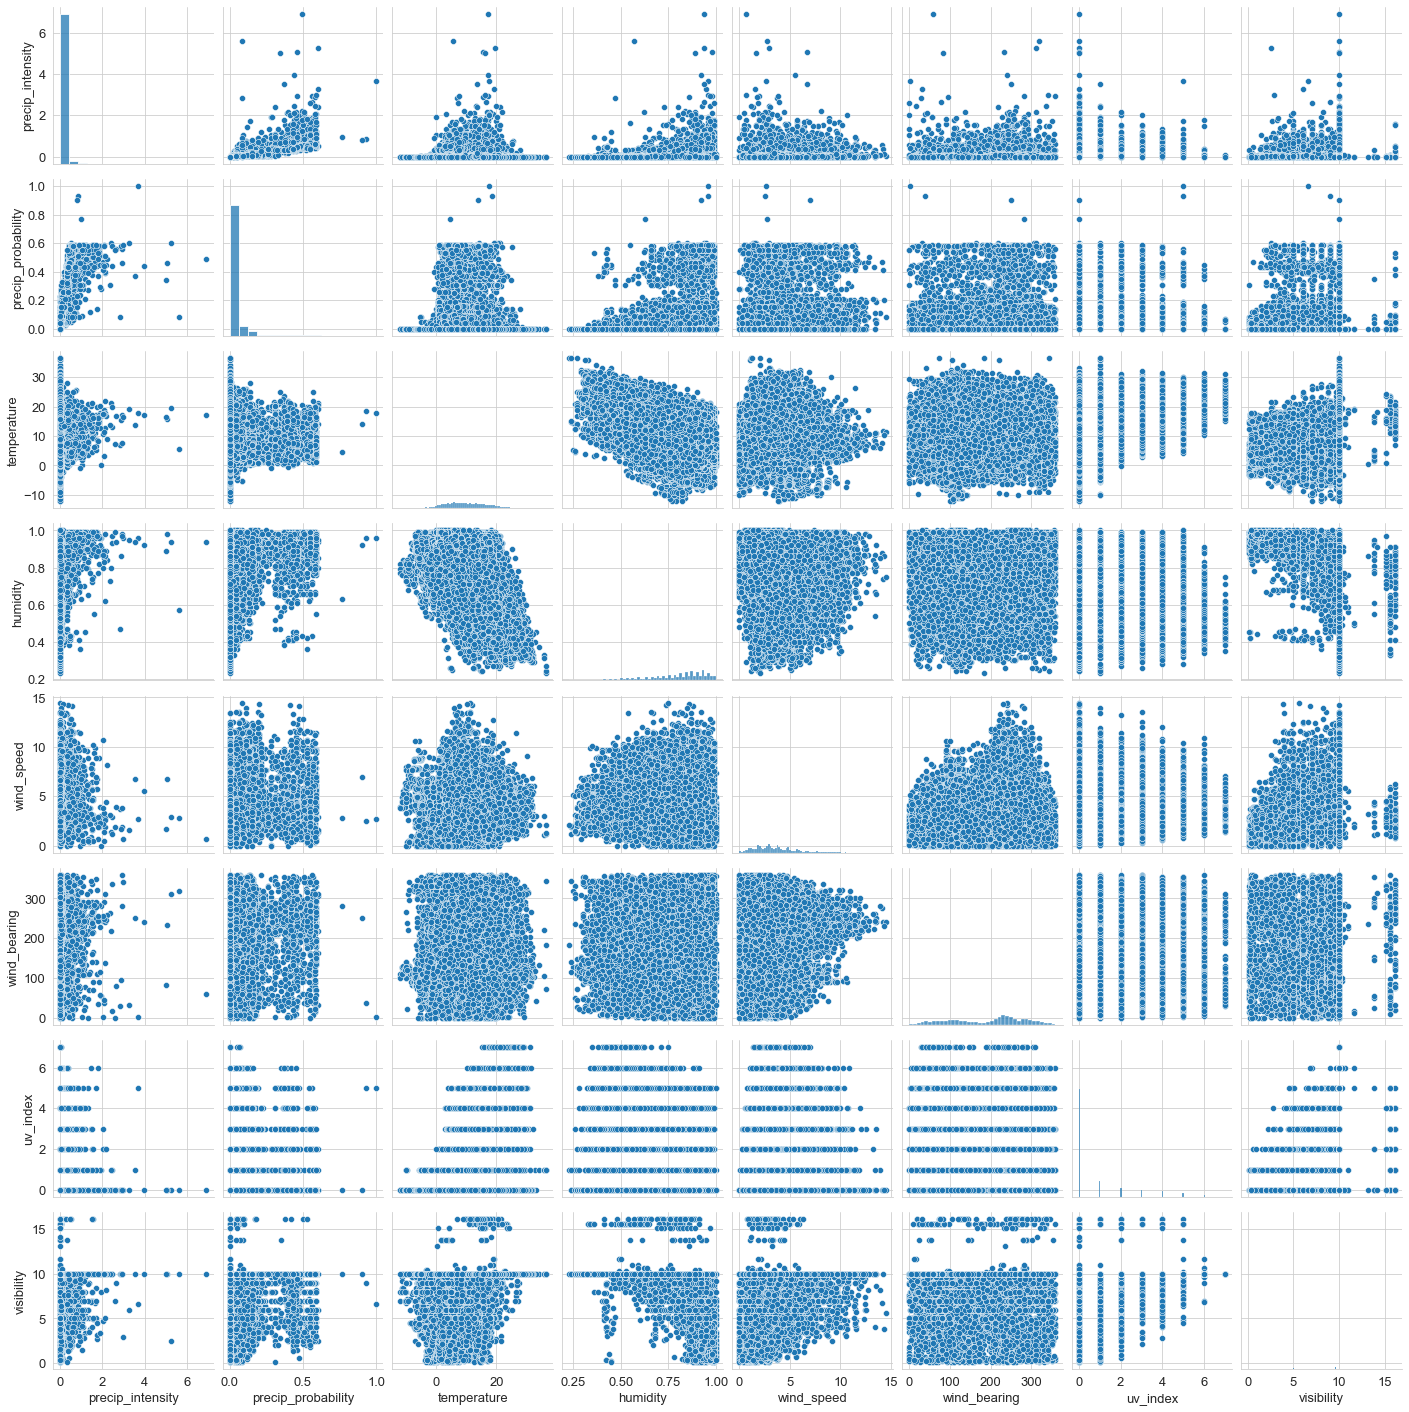

In [63]:
# Investigate the remaining columns

sns.pairplot(df)

In [64]:
#ProfileReport(df).to_notebook_iframe()

In [65]:
df.corr()

,precip_intensity,precip_probability,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility
precip_intensity,1.000000,0.732194,0.016255,0.129312,0.085031,0.045012,-0.017087,-0.067948
precip_probability,0.732194,1.000000,-0.033183,0.210236,0.169649,0.090203,-0.033407,-0.114541
temperature,0.016255,-0.033183,1.000000,-0.464070,-0.021279,-0.000822,0.428290,0.280661
humidity,0.129312,0.210236,-0.464070,1.000000,-0.119850,0.040546,-0.391800,-0.415318
wind_speed,0.085031,0.169649,-0.021279,-0.119850,1.000000,0.112269,0.104681,0.123720
wind_bearing,0.045012,0.090203,-0.000822,0.040546,0.112269,1.000000,0.068433,0.054655
uv_index,-0.017087,-0.033407,0.428290,-0.391800,0.104681,0.068433,1.000000,0.168766
visibility,-0.067948,-0.114541,0.280661,-0.415318,0.123720,0.054655,0.168766,1.000000


In [66]:
df.sample(5)

,datetime,precip_intensity,precip_probability,precip_type,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility
25707,2016-12-07 03:00:00,0.0,0.0,none,1.03,0.86,3.10,150.0,0,10.003
27402,2017-02-15 18:00:00,0.0,0.0,none,5.10,0.56,0.38,230.0,0,9.406
12147,2015-05-22 04:00:00,0.0,0.0,none,9.27,0.89,1.91,260.0,0,10.003
14580,2015-08-31 13:00:00,0.0,0.0,none,24.85,0.70,2.01,110.0,4,9.595
24147,2016-10-03 04:00:00,0.0,0.0,none,7.37,0.96,0.04,0.0,0,4.499


In [67]:
df.to_csv("../data/clean/weather.csv", index=False)